# <span style="color:red"> Numerical Simulation 10 </span>

## Exercise 10.1

#### <span style="color:black"> Objective </span>

This simulation aims to resolve the travel salesman problem (TSP) with the annealing algorithm instead genetic algorithm. The fictious hamiltonian that encodes the TSP is the path's length which correspond to a prescripted evolution of the type $e^{-\beta \times l}$ where $l$ is the length.

#### <span style="color:black"> Rappresentation choice </span>

The TSP was mapped into an $1D$ rappresentation which means that one integer number was assigned to every city and the path is expressed via $1D$ vector where elements are the cities and their positions are the visit order. The cost function to minimize is:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

#### <span style="color:black"> Code's description </span>

In our case $N$ was fixed equal to $32$ while the positions of the city were generated in two different way : randomly placed on a circonference, this was made sampling the angle from $0$ to $2 \pi$ and randomly placed inside a square, this was made generating random number between $-\frac{l}{2}$ and $\frac{l}{2}$ where l is the square side.


The code was build around two c++ classes individual and metropolis. 
**Individual** rappresent a path, it  contains the number of the city, lenght of the path, position of the cities and the path under the form of a vector. The methods of the individual class are the one which mutate a single individual, check if it fullfills the boundary condition and evaluate the length. The details of this method will be discussed later.
**Metropolis** contains two individual,old invidual is the one from which will be proposed a new move while new indivudal is the proposed move, the length of this individual and $\beta$ which will be changed during the simulation. The most important methods of this class are: $setBeta$ which allows to change $\beta$ and $move$ which make a metropolis step. The move will be surely accepted if $exp(-\beta \times (l_{new}-l_{old}))$ is greater than one otherwise it follows the same scheme of a regular metropolis.


The individual must fullfill boundary condition (BC) that are: first city must be the same for the entire population, each path must start and end at same city and every city can be visited only once. I've implemented a check function which work as it follows: first control the correctness of the first city after that with a double for cycle check if a city appear twice or never because it means that one misses. If it find something wrong exits from program and prints the type of the error and the individual.  

Mutation operators make up togheter the possible move of this algorithm. I implemented four different mutation mechanism inside the individual class:

- **swap** it takes two index and swap this two city, it was useful also for generating the starting population
- **rigid shift** it takes the size of the shift n and rigidly move every city forward of n position, except for the first city. it uses periodic boundary condition.
- **inversion** it takes two index of the region of the path to invert and invert this piece of the path.
- **permutation** it taks two index that rappresent the starting and ending point of the region to permutate with the nearest region of the same size.

Furthermore is present a mutation method inside individual class that consists in call with equal probability one of the previous methods. This is the one which will be called by metropolis move method.

#### <span style="color:black"> Making of the simulation </span>
The core of the simulation are two for cycle one inside the other. The "outside" for is the responsible of increasing $\beta$, how $\beta$ was changed is explained below, it consists of $M=150$ step. The "inside" for takes care of the $L$ metropolis moves at fixed $\beta$. Initially I set up $L=10000$ but after some try I found out that $L=3200$ was enough for every $\beta$.
Changing $\beta$ was the most challenging point of the simulation in fact if the increasing of $\beta$ is too "steep" the length won't achieve the real minimum otherwise it will take too to long execute the program. After various attempt I achieved a compromise by setting $0.006$ as starting $\beta$, named $\beta_0$ with an increase of the type $\beta_n=1.1 \times \beta_{n-1}$ where $n$ is the number of the iteration inside the cycle for raising up $\beta$. 

#### <span style="color:black"> Result </span>

The optimum path for the city around a circle is well known and it is easy to see that the algorithm achieve the correct result. The path length is off course slightly less than the circonference because the salesman takes linear trajectories. It's also evident that after around $100$ increasing beta steps in both, circle and square, cases the length reachs a minimum. The genetic algorithm (GA) and simulated annealing (SA) found out the same minimum length for the city around the circle while the SA discovered a different path from GA with lower length showing that GA falled in a local minimum. The positions of cities was generated with the same seed in order to compare the results between different algorithm. 

best lenght with genetic algorithm  6.21697
best lenght with simulated annealing  6.21697


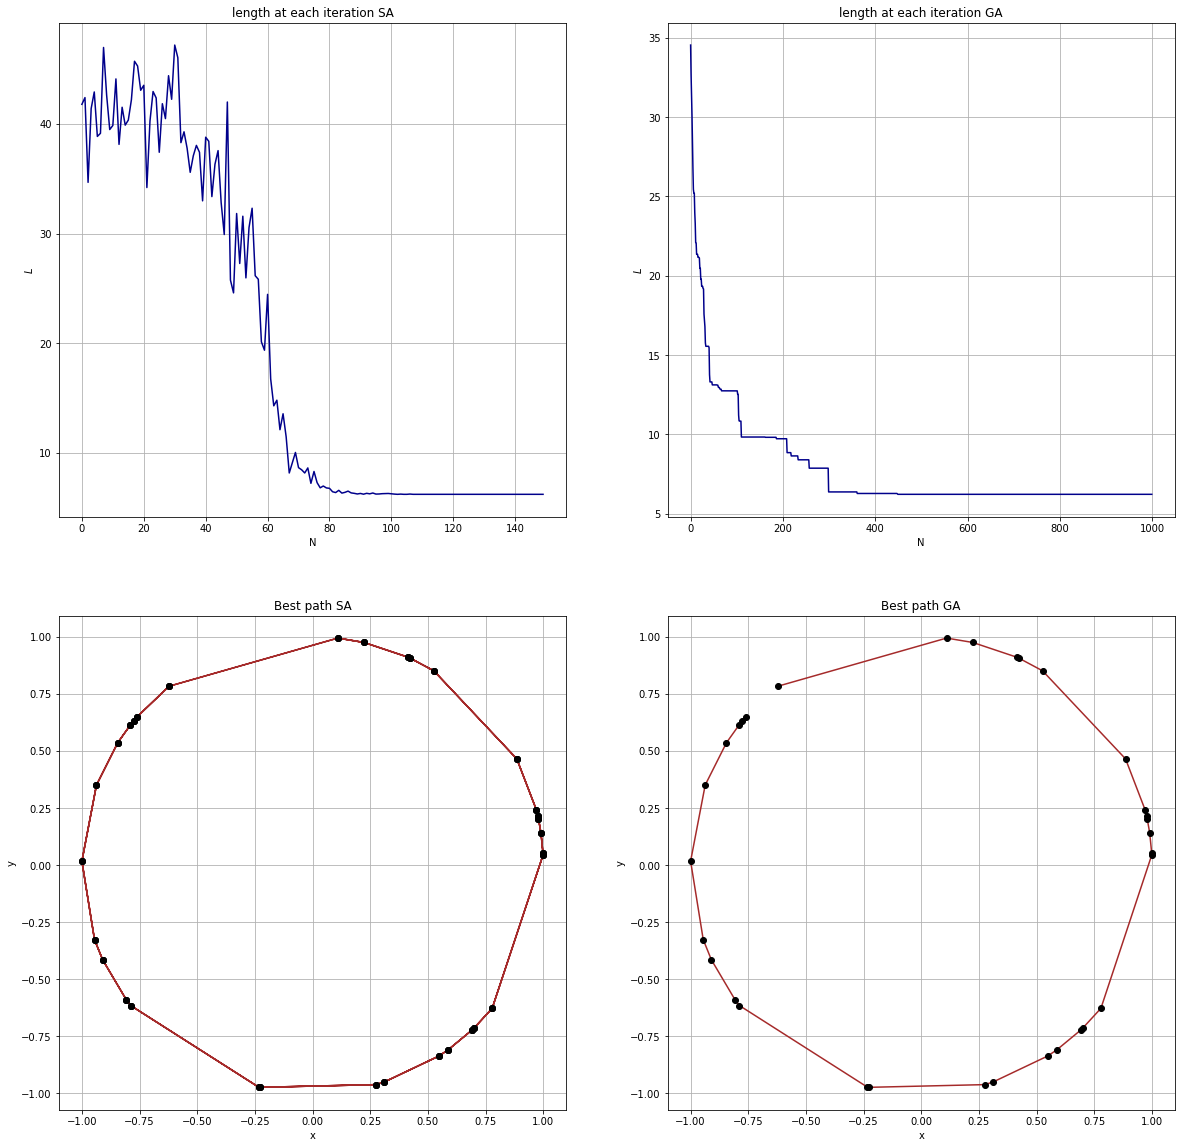

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(150)
L=np.loadtxt("length_c.0")
x_best, y_best=np.loadtxt("bestpath_c.0",unpack=True)

x1 = np.arange(1000)
L1=np.loadtxt("BestPathC.0")
x1_best, y1_best=np.loadtxt("pathC.0",usecols=(1,2) ,unpack=True)

fig=plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("length at each iteration SA")
plt.grid(True)


plt.subplot(222)
plt.plot(x1, L1, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("length at each iteration GA")
plt.grid(True)

plt.subplot(223)
plt.plot(x_best, y_best, color="brown")
plt.plot(x_best, y_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path SA")
plt.grid(True)

plt.subplot(224)
plt.plot(x1_best, y1_best, color="brown")
plt.plot(x1_best, y1_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path GA")
plt.grid(True)

print("best lenght with genetic algorithm ",L1[999])
print("best lenght with simulated annealing ",L[149])

plt.show()

best lenght with genetic algorithm  10.1152
best lenght with simulated annealing  9.65196


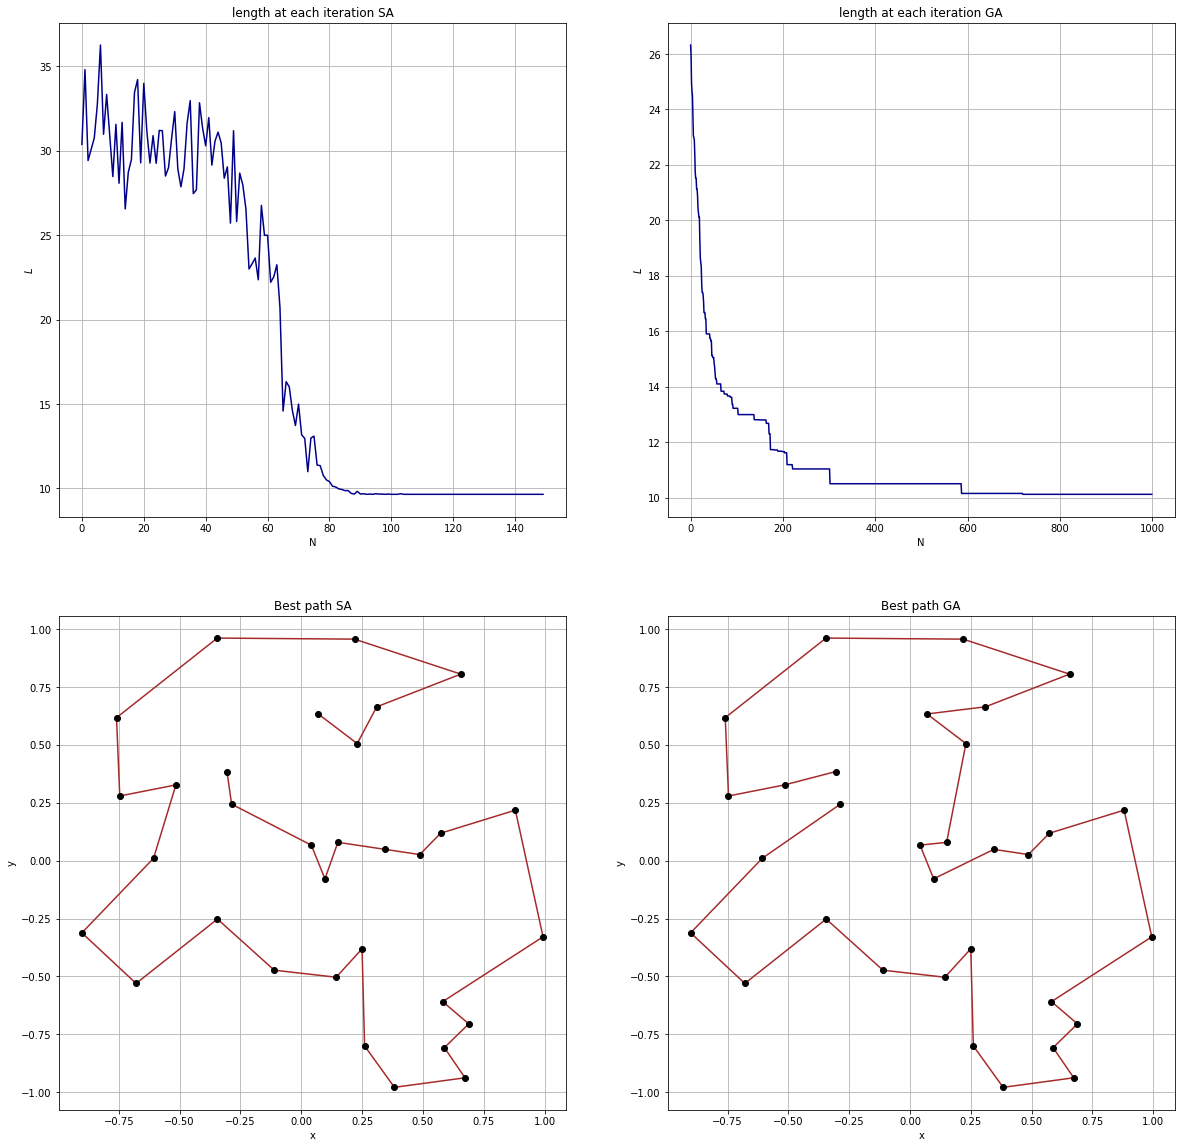

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(150)
L=np.loadtxt("length_s.0")
x_best, y_best=np.loadtxt("bestpath_s.0",unpack=True)

x1 = np.arange(1000)
L1=np.loadtxt("BestPathS.0")
x1_best, y1_best=np.loadtxt("pathS.0",usecols=(1,2) ,unpack=True)

fig=plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("length at each iteration SA")
plt.grid(True)


plt.subplot(222)
plt.plot(x1, L1, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("length at each iteration GA")
plt.grid(True)

plt.subplot(223)
plt.plot(x_best, y_best, color="brown")
plt.plot(x_best, y_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path SA")
plt.grid(True)

plt.subplot(224)
plt.plot(x1_best, y1_best, color="brown")
plt.plot(x1_best, y1_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path GA")
plt.grid(True)

print("best lenght with genetic algorithm ",L1[999])
print("best lenght with simulated annealing ",L[149])

plt.show()

## Exercise 10.2

#### <span style="color:black"> Objective </span>

The goal of this exercise was upgrading the genetic algorithm of exercise 9 using single program multiple data parralel computing paradigm with help of MPI libraries. In particular it's requested to implement some random exchange of the best path within different nodes. 


#### <span style="color:black"> Code's description </span>

The code is almost the same of exercise 9 with only a couple of shrewdness for working in parrallel way.
First of all it was necessary to use different random generator for setting the positions of city and evolving the system. In fact we want the same positions in order to make possible comparing the result between nodes although we need to avoid the same evolution for every node because this will mean repeating exactly the same simulation fourth. 
Another point to care attention of was how to build the random sending routine. I used this methods:

- setting an individual class variable with dimension 4 and filling it with "fictious city" from 0 to 3.
- at each repetion use swap method with random index so to change the fictious city and be sure that remain the correct number.
- using the fictious city as numbers to compare with rank for choosing who sends and who recives.


I've implemented this method because random generating integer number between 0 and 3 with uniform method and making sure they are different could be more expensive in terms of machine operations.

#### <span style="color:black"> Making of the simulation </span>

The  exchange was made every $100$ steps while the other parameters remain the same of exercise 9 in order to compare the result.

#### <span style="color:black"> Result </span>

It's easy to see with the pictures below that the algorithm achieve all the four times the same path which is a minimum lenght path. Compared with GA withouth exchange this raise up the possibilities to excape from a local minimum in fact it's trivial to observe in the last picture that with the same amount of iteration the parallel GA achieved a better minimum than the non-parallel GA and furthermore parallel GA stays lower than non-parallel GA all the steps of the simulation. 

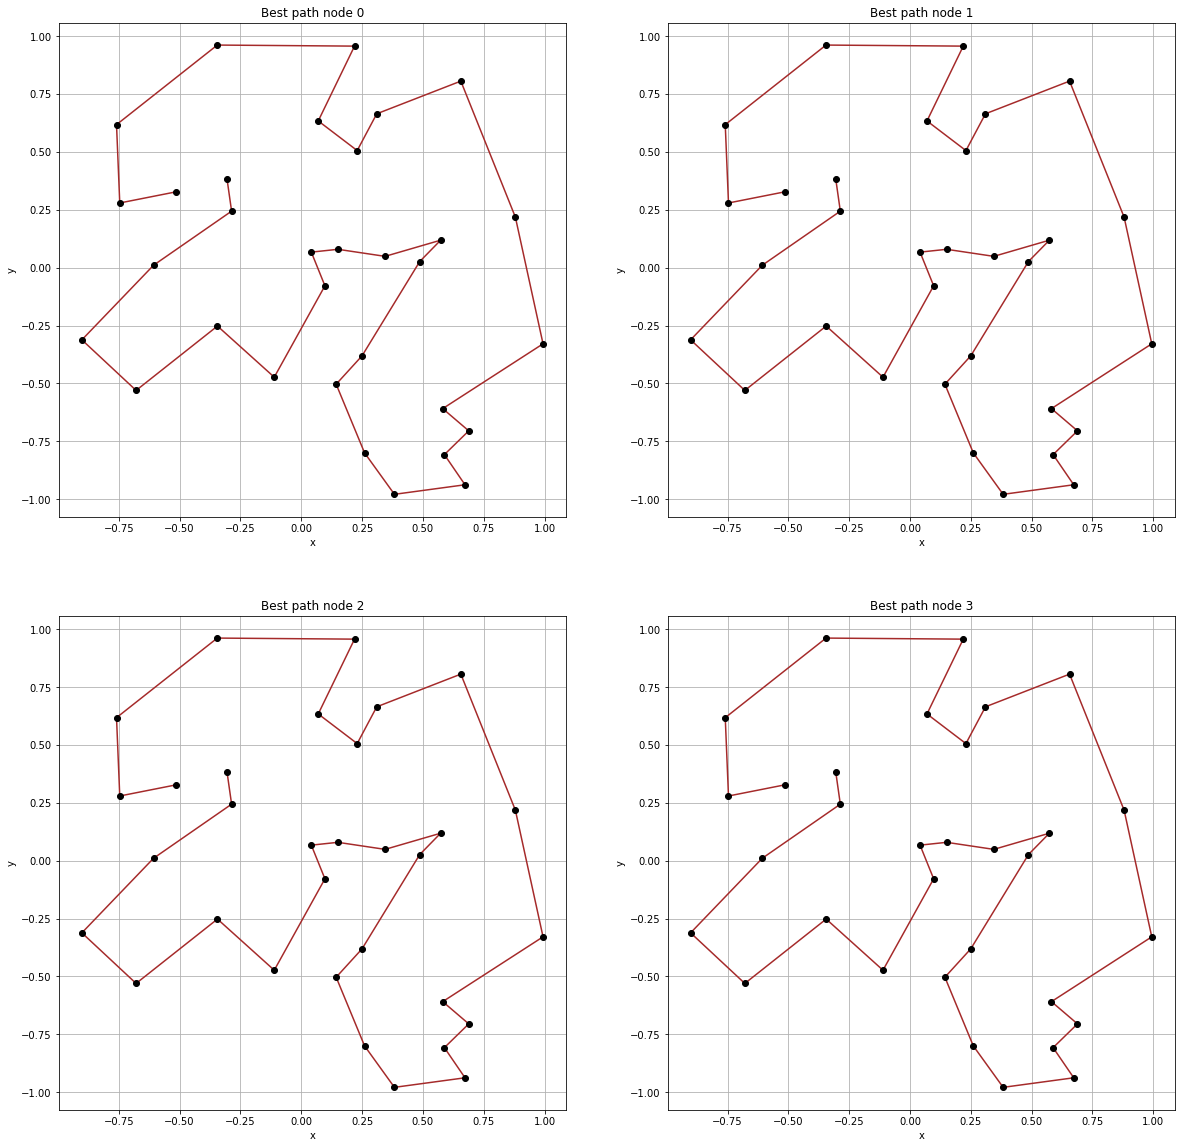

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x_best0, y_best0=np.loadtxt("pathS0.dat", usecols=(1,2), unpack=True)
x_best1, y_best1=np.loadtxt("pathS1.dat", usecols=(1,2), unpack=True)
x_best2, y_best2=np.loadtxt("pathS2.dat", usecols=(1,2), unpack=True)
x_best3, y_best3=np.loadtxt("pathS3.dat", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(20,20))

plt.subplot(221)
plt.plot(x_best0, y_best0, color="brown")
plt.plot(x_best0, y_best0, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path node 0")
plt.grid(True)

plt.subplot(222)
plt.plot(x_best1, y_best1, color="brown")
plt.plot(x_best1, y_best1, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path node 1")
plt.grid(True)

plt.subplot(223)
plt.plot(x_best2, y_best2, color="brown")
plt.plot(x_best2, y_best2, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path node 2")
plt.grid(True)

plt.subplot(224)
plt.plot(x_best3, y_best3, color="brown")
plt.plot(x_best3, y_best3, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path node 3")
plt.grid(True)

plt.show()

best lenght with genetic algorithm  9.91145
best lenght with simulated annealing  9.91145
best lenght with genetic algorithm  9.91145
best lenght with simulated annealing  9.91145


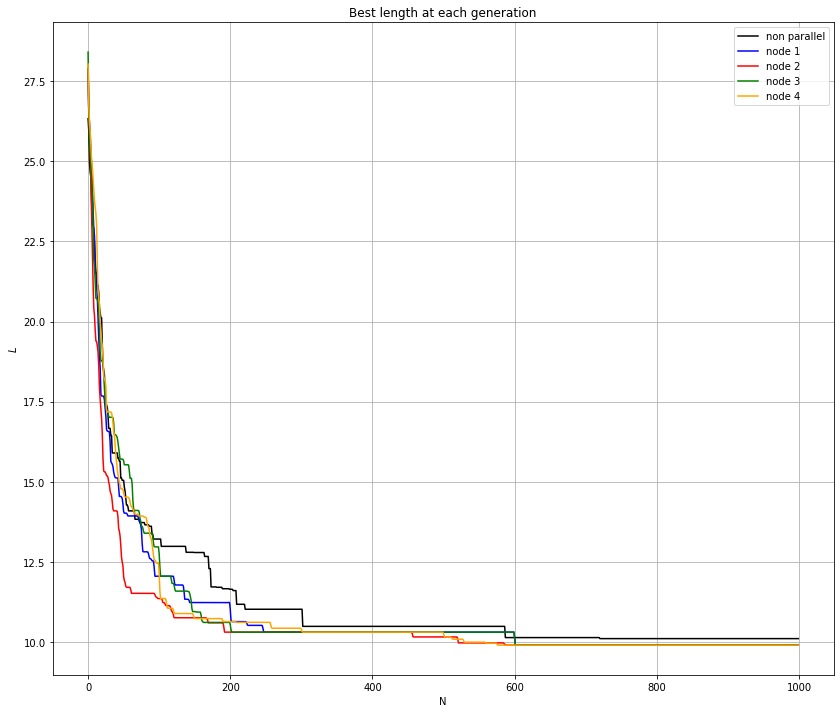

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(800)
x2 = np.arange(1000)

L=np.loadtxt("BestPathS.0")
L1=np.loadtxt("IterationAve0.dat")
L2=np.loadtxt("IterationAve1.dat")
L3=np.loadtxt("IterationAve2.dat")
L4=np.loadtxt("IterationAve3.dat")


fig=plt.figure(figsize=(14,12))
plt.plot(x2, L, color="black", label="non parallel")
plt.plot(x2, L1, color="blue", label="node 1")
plt.plot(x2, L2, color="red",label="node 2")
plt.plot(x2, L3, color="green",label="node 3")
plt.plot(x2, L4, color="orange",label="node 4")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)
plt.legend()

print("best lenght with genetic algorithm ",L1[799])
print("best lenght with simulated annealing ",L2[799])
print("best lenght with genetic algorithm ",L3[799])
print("best lenght with simulated annealing ",L4[799])

plt.show()